In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv') 
df.head() #Age is in month format #number how many spine is bad #which spine it starts

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
Age      81.0  83.654321  58.104251  1.0  26.0  87.0  130.0  206.0
Number   81.0   4.049383   1.619423  2.0   3.0   4.0    5.0   10.0
Start    81.0  11.493827   4.883962  1.0   9.0  13.0   16.0   18.0

## EDA

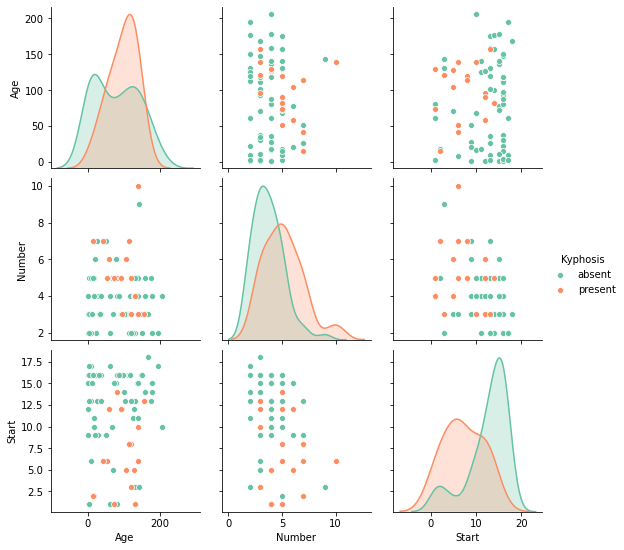

In [5]:
sns.pairplot(df, hue='Kyphosis',palette='Set2')

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

# Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
y_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[17  3]
 [ 3  2]]
              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



Text(0.5, 15.0, 'Predicted Label')

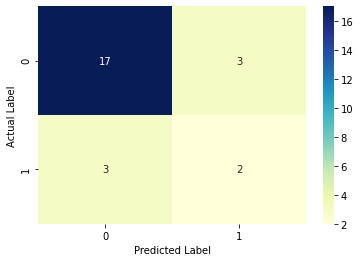

In [9]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [10]:
import sklearn
sklearn.__version__

'0.23.1'

In [11]:
y.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

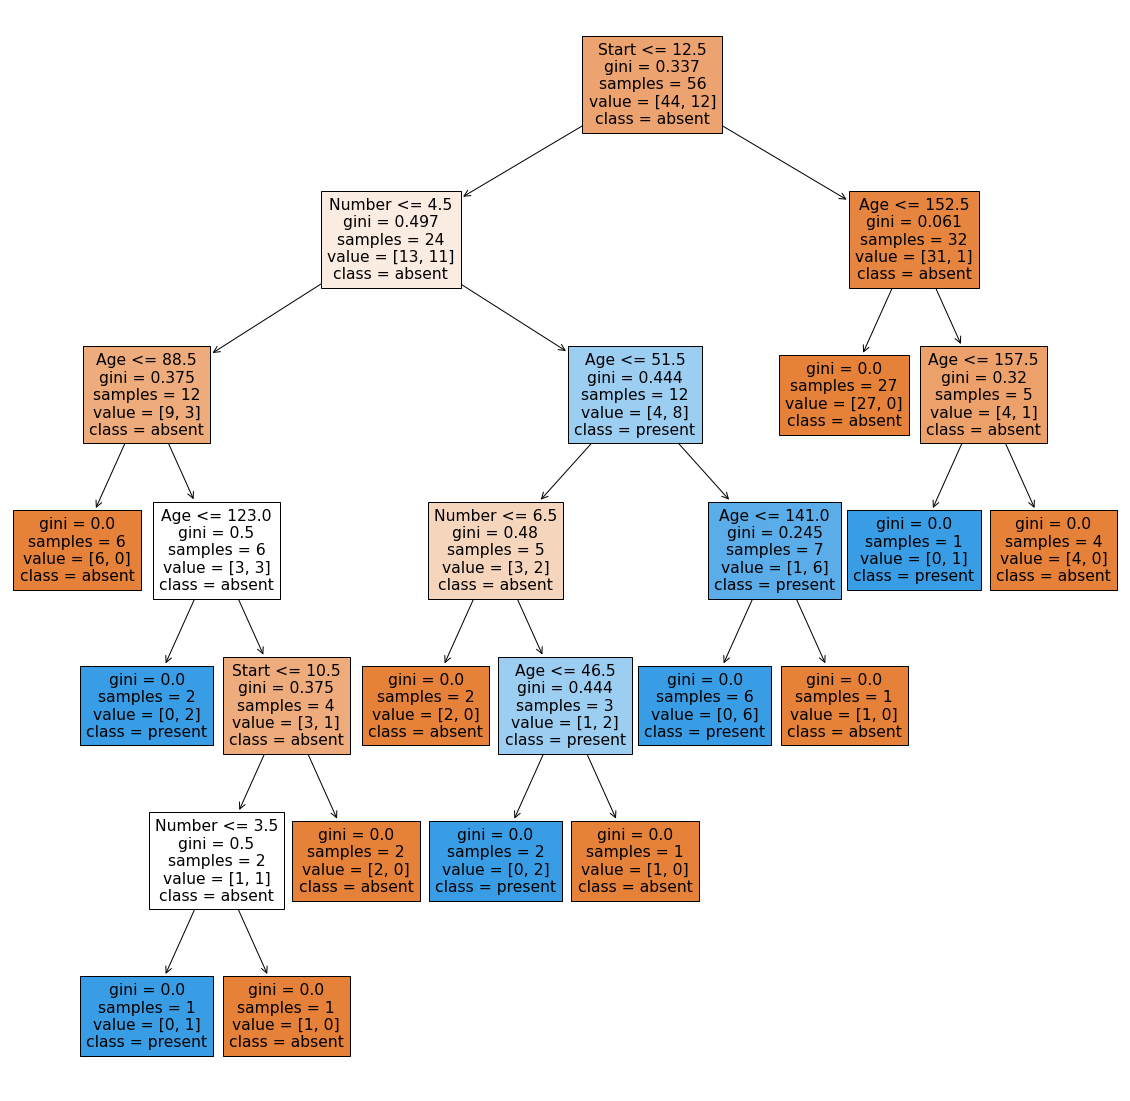

In [12]:
from sklearn import tree
features = list(df.columns[1:])
targets = ["absent", "present"]

plt.figure(figsize=(20,20))
#plt.style.use('dark_background')
tree2 = tree.plot_tree(dtree,filled=True,feature_names=features ,class_names = targets)

[[19  1]
 [ 3  2]]
              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        20
     present       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25



Text(0.5, 15.0, 'Predicted Label')

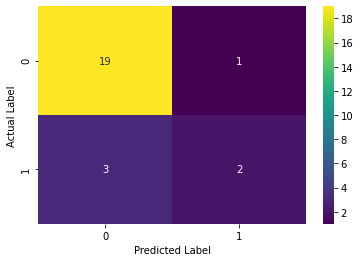

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

sns.heatmap(cnf_matrix, annot=True, cmap="viridis",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [17]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
tree.plot_tree(model.estimators_[0], feature_names = fn, class_names=cn, filled = True);